In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
% matplotlib inline

/Users/Scott/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
UBER_AP_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
UBER_M_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
UBER_JU_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
UBER_JL_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
UBER_AU_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
UBER_SEP_2014 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')
UBER_2015 = pd.read_csv('./uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')


In [3]:
frames = [UBER_AP_2014,UBER_M_2014,UBER_JU_2014,UBER_JL_2014,UBER_AU_2014,UBER_SEP_2014]
UBER_2014 = pd.concat(frames)

In [4]:
UBER_2014.reset_index(drop= True, inplace = True)
#When I concatenated the index, the indexes are not in the correct order so I just reset the order
#To check if this problem occurs with you, just check the unique values of your index and the num of rows

In [5]:
UBER_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
UBER_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [7]:
UBER_2014['Date/Time'] = pd.to_datetime(UBER_2014['Date/Time'], format="%m/%d/%Y %H:%M:%S")
UBER_2014['Month'] = UBER_2014['Date/Time'].dt.month
UBER_2014['DayOfWeek'] = UBER_2014['Date/Time'].dt.dayofweek
UBER_2014['weekday_name'] = UBER_2014['Date/Time'].dt.weekday_name
UBER_2014['DayOfMonth'] = UBER_2014['Date/Time'].dt.day
UBER_2014['Hour'] = UBER_2014['Date/Time'].dt.hour
UBER_2014['Minute'] = UBER_2014['Date/Time'].dt.minute
# Separating the date time using pandas datetime

In [8]:
UBER_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 10 columns):
Date/Time       datetime64[ns]
Lat             float64
Lon             float64
Base            object
Month           int64
DayOfWeek       int64
weekday_name    object
DayOfMonth      int64
Hour            int64
Minute          int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 345.9+ MB


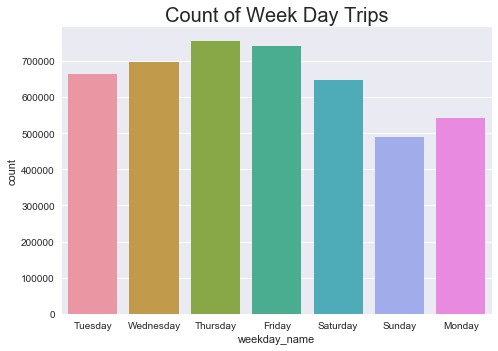

In [9]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.countplot(UBER_2014.weekday_name).set_title('Count of Week Day Trips',fontsize = 20)

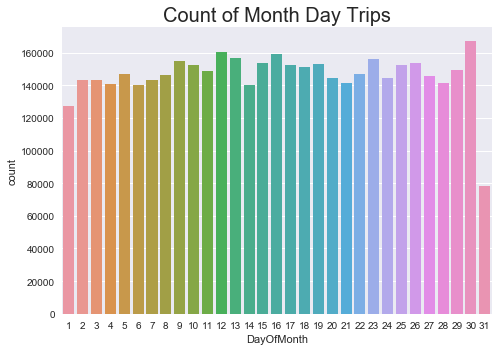

In [10]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.countplot(UBER_2014.DayOfMonth).set_title('Count of Month Day Trips',fontsize = 20)
#Note that the 31st looks a lot less than the other days but that bec only half of the months tested have 31 days. 

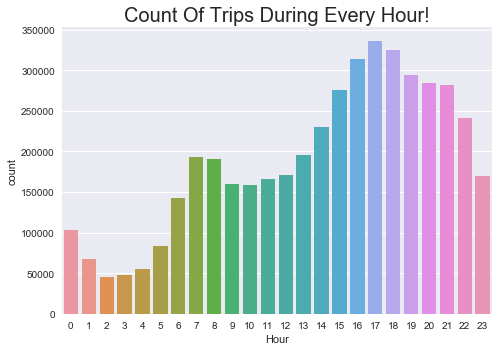

In [12]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.countplot(UBER_2014.Hour).set_title('Count Of Trips During Every Hour!',fontsize = 20)

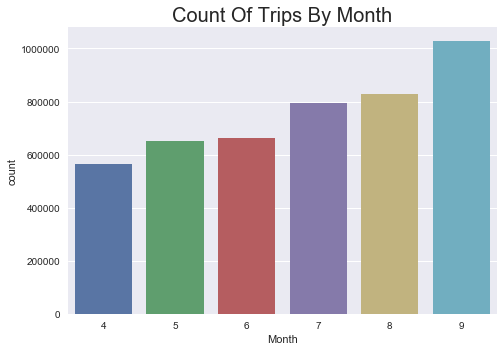

In [13]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.countplot(UBER_2014.Month).set_title('Count Of Trips By Month',fontsize = 20)

# Looking at 2015 Data

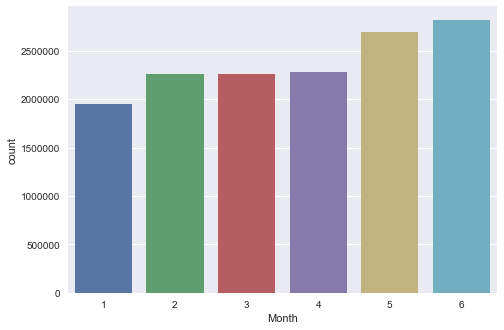

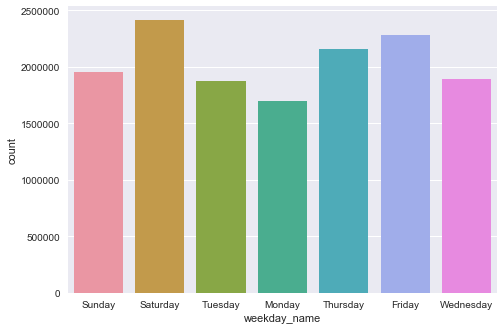

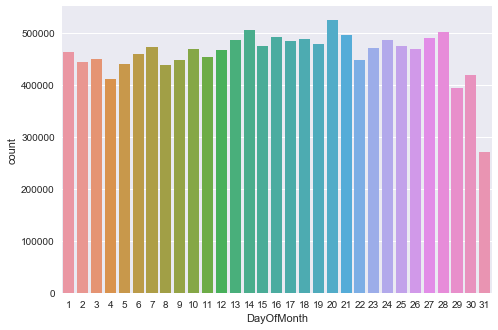

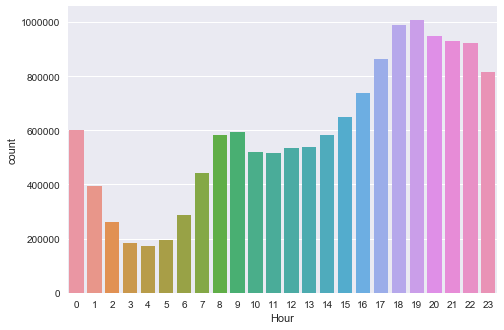

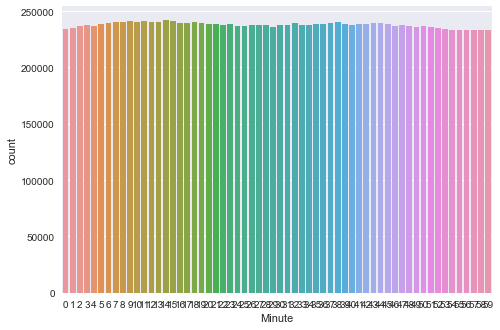

In [14]:
UBER_2015['Date/Time'] = pd.to_datetime(UBER_2015['Pickup_date'], format="%Y-%m-%d %H:%M:%S")
UBER_2015['Month'] = UBER_2015['Date/Time'].dt.month
UBER_2015['DayOfWeek'] = UBER_2015['Date/Time'].dt.dayofweek
UBER_2015['weekday_name'] = UBER_2015['Date/Time'].dt.weekday_name
UBER_2015['DayOfMonth'] = UBER_2015['Date/Time'].dt.day
UBER_2015['Hour'] = UBER_2015['Date/Time'].dt.hour
UBER_2015['Minute'] = UBER_2015['Date/Time'].dt.minute
#Separating the date time using pandas datetime

columns_2015 =  ['Month', 'weekday_name','DayOfMonth', 'Hour', 'Minute']
for x in columns_2015: 
    sns.countplot(UBER_2015[x])
    plt.show()

# LYFT Data

In [19]:
LYFT_2014 = pd.read_csv('/Users/Scott/Documents/DSI6/My Projects /Uber NYC /uber-pickups-in-new-york-city/other-Lyft_B02510.csv')

In [25]:
LYFT_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267701 entries, 0 to 267700
Data columns (total 11 columns):
time_of_trip    267701 non-null object
start_lat       267700 non-null float64
start_lng       267700 non-null float64
Unnamed: 3      1198 non-null object
Date/Time       267701 non-null datetime64[ns]
Month           267701 non-null int64
DayOfWeek       267701 non-null int64
weekday_name    267701 non-null object
DayOfMonth      267701 non-null int64
Hour            267701 non-null int64
Minute          267701 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 22.5+ MB


In [20]:
LYFT_2014.head(1)

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN


In [21]:
LYFT_2014['Date/Time'] = pd.to_datetime(LYFT_2014['time_of_trip'], format="%m/%d/%Y %H:%M")
LYFT_2014['Month'] = LYFT_2014['Date/Time'].dt.month
LYFT_2014['DayOfWeek'] = LYFT_2014['Date/Time'].dt.dayofweek
LYFT_2014['weekday_name'] = LYFT_2014['Date/Time'].dt.weekday_name
LYFT_2014['DayOfMonth'] = LYFT_2014['Date/Time'].dt.day
LYFT_2014['Hour'] = LYFT_2014['Date/Time'].dt.hour
LYFT_2014['Minute'] = LYFT_2014['Date/Time'].dt.minute
# Separating the date time using pandas datetime

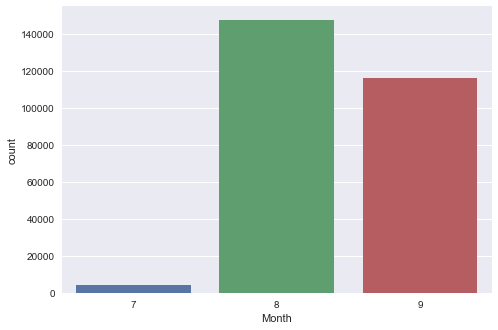

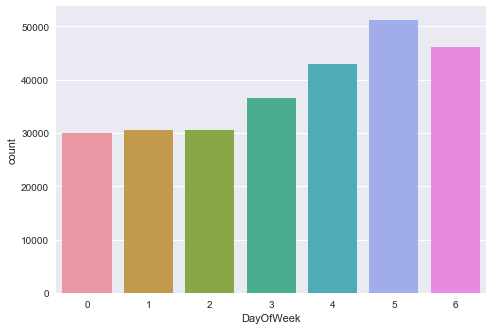

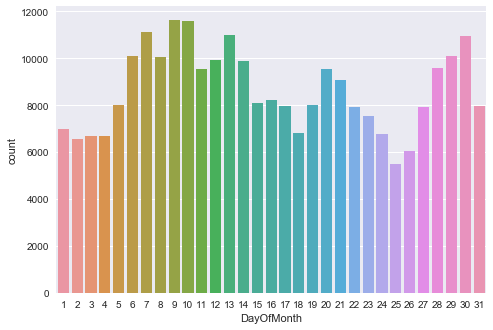

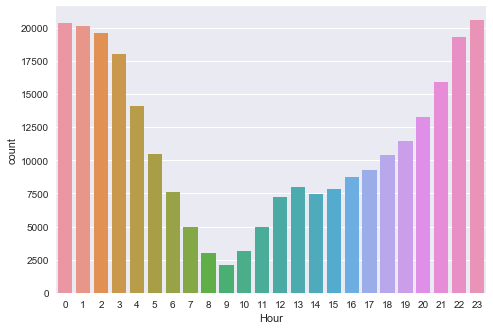

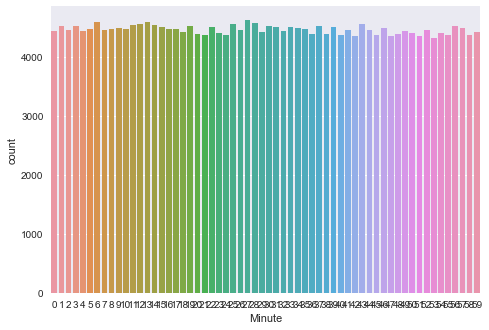

In [24]:
columns_2014 =  ['Month', 'DayOfWeek','DayOfMonth', 'Hour', 'Minute']
for x in columns_2014: 
    sns.countplot(LYFT_2014[x])
    plt.show()

In [82]:
UBER_2014_89 = UBER_2014[UBER_2014['Month'].between(8,9)]

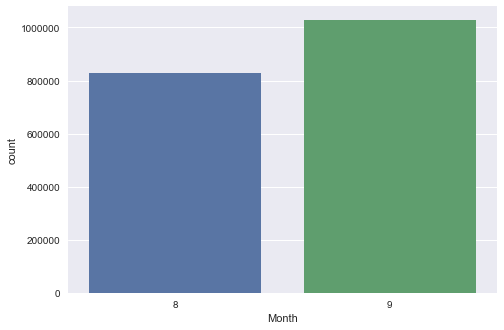

In [89]:
sns.countplot(UBER_2014_89['Month'])
# I just wanted to compare how many more rides were taken in UBER compared to Lyft in 2014 August and September.